In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test = pd.read_csv('test.csv')

In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Axes: xlabel='count', ylabel='Sex'>

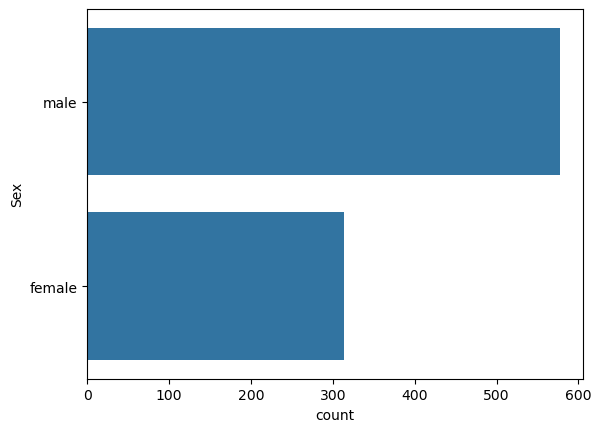

In [7]:
sns.countplot(train['Sex'])

<Axes: xlabel='count', ylabel='Embarked'>

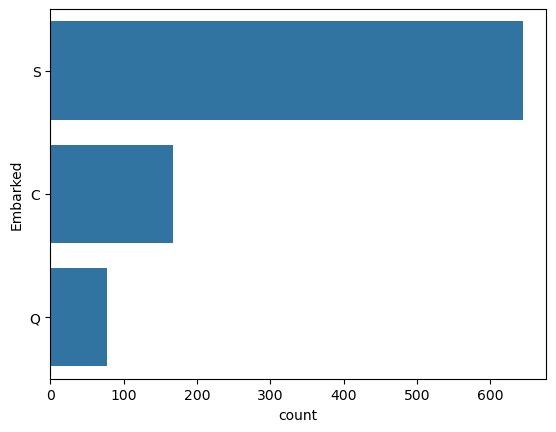

In [8]:
sns.countplot(train['Embarked'])

<Axes: xlabel='Age', ylabel='Density'>

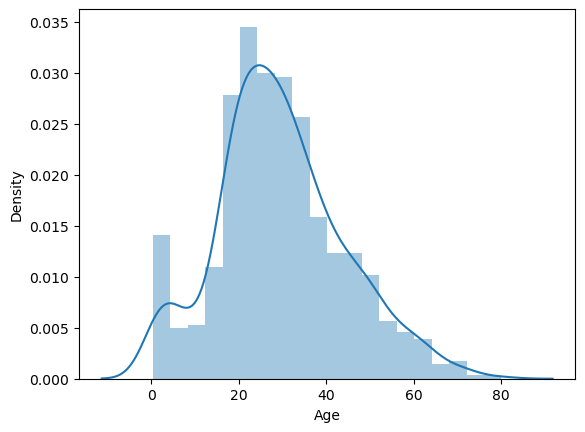

In [9]:
sns.distplot(train['Age'])

<Axes: xlabel='Fare', ylabel='Density'>

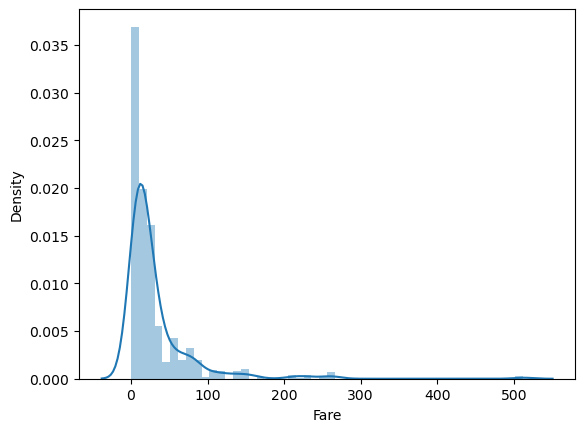

In [10]:
sns.distplot(train['Fare'])

# Survived,Pclass attributes are having high cardinality data which causes some difficulty in visualization.
To ensure that the Survived, Pclass columns are categorical and contains the expected values (usually 0 for did not survive and 1 for survived):

In [12]:
train['Survived'].unique()

array([0, 1], dtype=int64)

In [13]:
train['Survived'] = train['Survived'].astype('category')

<Axes: xlabel='count', ylabel='Survived'>

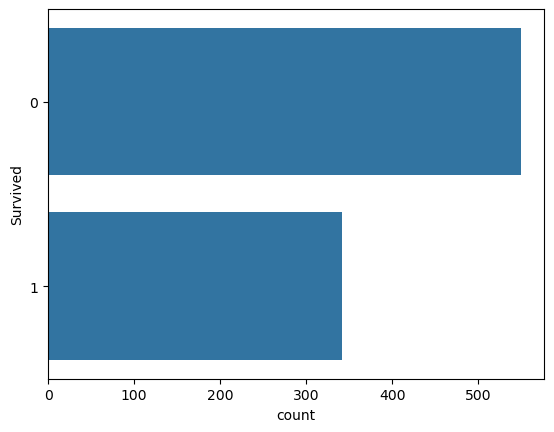

In [14]:
sns.countplot(train['Survived'])

In [15]:
train['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [16]:
train['Pclass'] = train['Pclass'].astype('category')

<Axes: xlabel='count', ylabel='Pclass'>

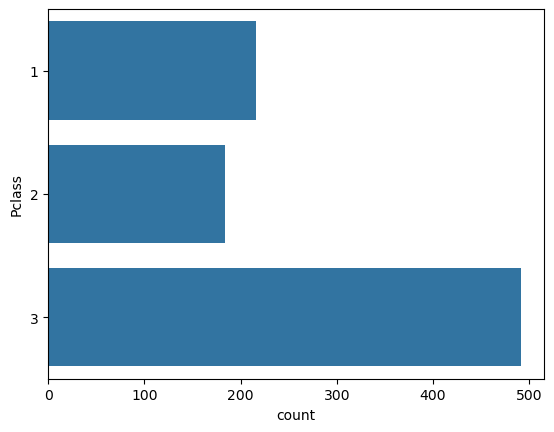

In [17]:
sns.countplot(train['Pclass'])

# Data Preprocessing

In [19]:
train_len = len(train)

To perform Data preprocessing on train dataset and test dataset simultaneously, we can concatenate both datasets into single dataset.

In [21]:
data = pd.concat([train,test],axis=0)
df = pd.DataFrame(data)

In [22]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [23]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [24]:
df.reset_index()

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [25]:
cols_del = ['Name','Ticket','Cabin']

In [26]:
df.drop(cols_del,axis=1)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,male,NaN,0,0,8.0500,S
414,1306,NaN,1,female,39.0,0,0,108.9000,C
415,1307,NaN,3,male,38.5,0,0,7.2500,S
416,1308,NaN,3,male,NaN,0,0,8.0500,S


check for null values

We can understand that there are some null values in Survived, Age, Fare and Embarked attributes.

Age and fare are numerical attributes.

In [29]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [30]:
df['Fare'] = df['Fare'].fillna(df['Fare'].mean())

In [31]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [32]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [33]:
df.drop(columns=['Cabin','Name','Ticket','PassengerId'],axis=1,inplace=True)

In [34]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


Once again, let us revert to Fare attribute visualisation.

<Axes: xlabel='Fare', ylabel='Density'>

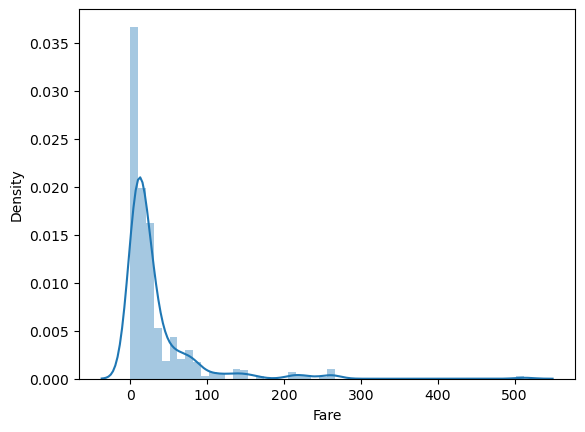

In [36]:
sns.distplot(df['Fare'])

We can understand that Fare attribute does not have uniform distribution which is difficult for training the model.

To avoid such difficulty let us, use log transformation.

In [38]:
df['Fare'] = np.log(df['Fare']+1)

<Axes: xlabel='Fare', ylabel='Density'>

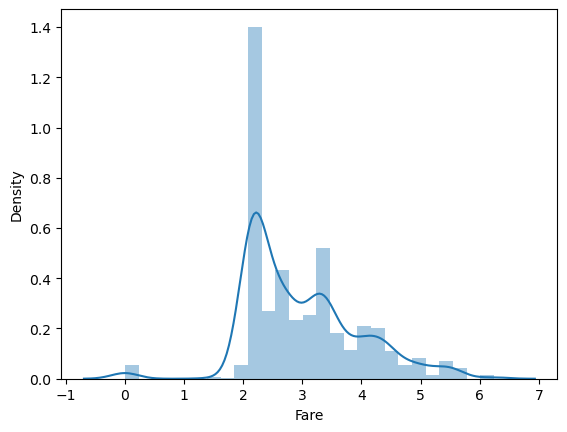

In [39]:
sns.distplot(df['Fare'])

# Correlation Matrix

In [41]:
from sklearn.preprocessing import LabelEncoder

In [42]:
le = LabelEncoder()

In [43]:
df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])

In [44]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,2.110213,2
1,1,1,0,38.0,1,0,4.280593,0
2,1,3,0,26.0,0,0,2.188856,2
3,1,1,0,35.0,1,0,3.990834,2
4,0,3,1,35.0,0,0,2.202765,2


In [45]:
corr = df.corr()
corr

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,-0.543351,-0.070323,-0.035322,0.081629,0.329862,-0.167675
Pclass,-0.338481,1.000000,0.124617,-0.366371,0.060832,0.018322,-0.685333,0.185479
Sex,-0.543351,0.124617,1.000000,0.057397,-0.109609,-0.213125,-0.249907,0.097960
Age,-0.070323,-0.366371,0.057397,1.000000,-0.190747,-0.130872,0.174203,-0.071181
SibSp,-0.035322,0.060832,-0.109609,-0.190747,1.000000,0.373587,0.311334,0.065567
Parch,0.081629,0.018322,-0.213125,-0.130872,0.373587,1.000000,0.323252,0.044772
Fare,0.329862,-0.685333,-0.249907,0.174203,0.311334,0.323252,1.000000,-0.211711
Embarked,-0.167675,0.185479,0.097960,-0.071181,0.065567,0.044772,-0.211711,1.000000


In [46]:
plt.figure(figure=(5,9))

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Axes: >

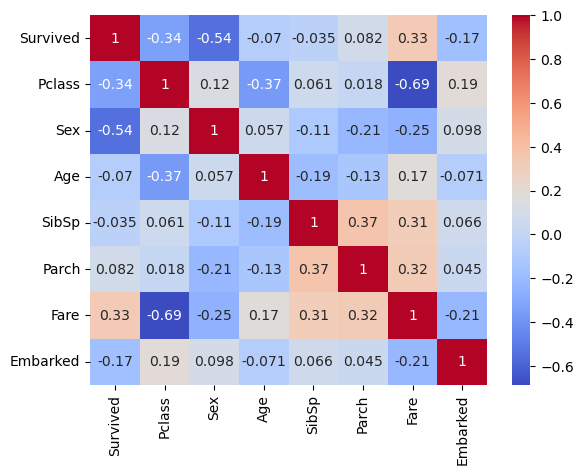

In [47]:
sns.heatmap(corr, annot = True, cmap = 'coolwarm')

In [48]:
train = df.iloc[:train_len,:]

In [49]:
test = df.iloc[train_len:,:]

In [50]:
train.tail()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
886,0,2,1,27.000000,0,0,2.639057,2
887,1,1,0,19.000000,0,0,3.433987,2
888,0,3,0,29.881138,1,2,3.196630,2
889,1,1,1,26.000000,0,0,3.433987,0
890,0,3,1,32.000000,0,0,2.169054,1


In [51]:
test.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,NaN,3,1,34.5,0,0,2.178064,1
1,NaN,3,0,47.0,1,0,2.079442,2
2,NaN,2,1,62.0,0,0,2.369075,1
3,NaN,3,1,27.0,0,0,2.268252,2
4,NaN,3,0,22.0,1,1,2.586824,2


In [52]:
test = test.drop(columns='Survived')

In [53]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,2.178064,1
1,3,0,47.0,1,0,2.079442,2
2,2,1,62.0,0,0,2.369075,1
3,3,1,27.0,0,0,2.268252,2
4,3,0,22.0,1,1,2.586824,2


In [54]:
X = train.drop(columns=['Survived'],axis=1)

In [55]:
Y = train['Survived']

In [56]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,2.110213,2
1,1,0,38.0,1,0,4.280593,0
2,3,0,26.0,0,0,2.188856,2
3,1,0,35.0,1,0,3.990834,2
4,3,1,35.0,0,0,2.202765,2


# Model Training with Decision Tree

In [132]:
from sklearn.model_selection import train_test_split, cross_val_score

In [134]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

In [136]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [138]:
print("Accuracy: ",model.score(x_test,y_test))
print("Cross Validation Score: ",np.mean(cross_val_score(model, X, Y, cv=5)))

Accuracy:  0.8435754189944135
Cross Validation Score:  0.7665746029753311


# Model Training with Logistic Regression

In [145]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [147]:
print("Accuracy: ",model.score(x_test,y_test))
print("Cross Validation Score: ",np.mean(cross_val_score(model, X, Y, cv=5)))

Accuracy:  0.8044692737430168
Cross Validation Score:  0.7833971502102819


# Model Training with Random Forest

In [152]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

In [154]:
print("Accuracy: ",model.score(x_test,y_test))
print("Cross Validation Score: ",np.mean(cross_val_score(model, X, Y, cv=5)))

Accuracy:  0.8156424581005587
Cross Validation Score:  0.8103383340656581


Out of all the three models, we can understand that Random Forest model's prediction is better than the other 2 models.

So we can finally perform model training completely using RandomForestClassifier().

# Complete Model Training

In [158]:
model = RandomForestClassifier()

In [160]:
model.fit(X,Y)

RandomForestClassifier()

In [162]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,2.178064,1
1,3,0,47.0,1,0,2.079442,2
2,2,1,62.0,0,0,2.369075,1
3,3,1,27.0,0,0,2.268252,2
4,3,0,22.0,1,1,2.586824,2


In [176]:
predictions = model.predict(test)
predictions

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

# Prediction for test dataset is done.